# Lab review

In [2]:
from scipy import stats
import numpy as np
import math

In [9]:
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
pop_std=4

conf_int=stats.norm.interval(0.8, loc=np.mean(heights), scale=pop_std/len(heights)**0.5)
conf_int

(172.14308590115726, 174.79024743217607)

In [5]:
total_shops = 105;
loss_shops = 27;
score_80 = stats.norm.interval(0.80)[1];
score_90 = stats.norm.interval(0.90)[1];

# Parameters
p = loss_shops / total_shops;
se = math.sqrt((p * (1 - p)) / total_shops);

conf_int80 = stats.norm.interval(0.80, loc=p, scale=se)
conf_int90 = stats.norm.interval(0.90, loc=p, scale=se)
print(f"Confidence interval 80%: {conf_int80}")
print(f"Confidence interval 90%: {conf_int90}")

Confidence interval 80%: (0.20248138545542083, 0.3118043288302934)
Confidence interval 90%: (0.1869856177645281, 0.3273000965211861)


In [6]:
sample = [9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6];
df = len(sample) - 1
score = stats.t.interval(0.95, df)[1]

# Parameters
tstudent_mean = np.mean(sample);
sample_quasi_std = np.std(sample) * math.sqrt((len(sample) / df))
tstudent_std = sample_quasi_std / math.sqrt(len(sample));

stats.t.interval(0.95, df, loc=tstudent_mean, scale=tstudent_std)

(9.738414120176683, 10.261585879823317)

In [13]:
df = len(heights) - 1
score = stats.chi2.interval(0.90, df)

# Parameters
sample_quasi_var = np.var(heights) * (len(heights) / df)

conf_int=[df*sample_quasi_var/score[1], df*sample_quasi_var/score[0]]
conf_int

[31.992400675216064, 115.32123613002646]

In [17]:
import pandas as pd

In [18]:
df=pd.Series(heights)

In [21]:
print(df.std())
print(np.std(heights))

7.356888576280704
7.107429602574728


In [16]:
?np.var

In [14]:
np.var(heights)

50.51555555555555

In [15]:
score

(6.570631383789342, 23.684791304840576)

In [22]:
zscore=stats.norm.interval(0.99)[1]

In [23]:
zscore

2.5758293035489004

In [24]:
error=0.5

In [29]:
n=(zscore*pop_std/error)**2
np.ceil(n)

425.0

In [30]:
score=stats.norm.interval(0.8)[1]

In [31]:
error=0.01

In [34]:
p=27/105
q=1-p

In [35]:
n=(score*(p*q)**0.5/error)**2
np.ceil(n)

3138.0

# Hypothesis Testing

In [37]:
txt1='169.7 168.5 165.9 177.8 179.6 168.9 169.2 167.9 181.1 163.3'
txt2='168.2 166.4 166.7 177.2 177.9 168.0 169.5 166.7 182.5 161.1'

morning=[float(i) for i in txt1.split()]
evening=[float(i) for i in txt2.split()]

In [40]:
morning

[169.7, 168.5, 165.9, 177.8, 179.6, 168.9, 169.2, 167.9, 181.1, 163.3]

In [39]:
evening

[168.2, 166.4, 166.7, 177.2, 177.9, 168.0, 169.5, 166.7, 182.5, 161.1]

*H0: on average height remains the same*

*H1: on average height decreases*

In [43]:
diff=np.subtract(morning,evening)

In [44]:
diff.mean()

0.7700000000000046

In [46]:
df=diff.size-1
stdd=diff.std()*diff.size/df

In [47]:
stdd

1.3034143197344774

In [57]:
tscore=stats.t.interval(0.95, df)[1]

In [72]:
stats.t.interval(0.95, df, loc=diff.mean(), scale=stdd/diff.size**0.5)[1]

1.7024064349395371

In [60]:
tscore

2.2621571627409915

Conclusion: according to our test, we can't reject the Null Hypothesis. 

In [73]:
tscore=stats.t.interval(0.90, df)[0]
tscore

-1.833112932653634

Conclusion: according to our test, we can't reject the Null Hypothesis. 

In [81]:
stats.ttest_ind(morning,evening)

Ttest_indResult(statistic=0.27176000419285196, pvalue=0.7888990292231379)

In [82]:
stats.ttest_ind(morning,evening)[1]/2

0.39444951461156896

In [83]:
stats.ttest_ind(evening,morning)[1]/2

0.39444951461156896

# More Hypo Tests

In [85]:
import pandas as pd

In [86]:
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/blood_pressure.csv')
df.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


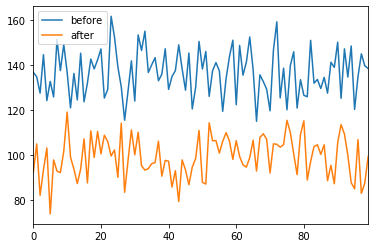

In [89]:
df.plot()

In [90]:
from scipy.stats import ttest_rel, ttest_ind, ttest_1samp

In [91]:
ttest_rel(df.after, df.before)

Ttest_relResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [100]:
df.eval('after-before')

0    -44.280107
1    -29.712975
2    -45.286349
3    -50.919953
4    -21.002497
        ...    
95   -35.174243
96   -27.881053
97   -61.813863
98   -52.113548
99   -38.997329
Length: 100, dtype: float64

In [98]:
ttest_1samp(df.eval('after-before'),0)

Ttest_1sampResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [101]:
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/ab_test.csv')

In [102]:
df.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
a    50 non-null float64
b    50 non-null float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [107]:
df.var()

a    27.408054
b    42.136396
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C1A1E84E0>,
      dtype=object)

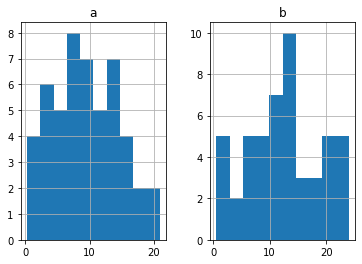

In [106]:
df.hist()

In [109]:
ttest_ind(df.a[:-10],df.b)

Ttest_indResult(statistic=-2.091004803053096, pvalue=0.03941077977600159)

In [110]:
ttest_rel(df.a[:-10],df.b)

ValueError: unequal length arrays

In [112]:
ttest_ind(df.a,df.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

In [113]:
ttest_ind(df.a,df.b, equal_var=True)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [114]:
from scipy.stats import levene

In [115]:
levene(df.a,df.b)

LeveneResult(statistic=1.6066399043984099, pvalue=0.2079683123270197)

In [116]:
?levene

# lab

In [118]:
df=pd.read_csv(r'C:\Users\eldiy\Documents\GitHub\Oct_EveryDayCode\Module2_Solutions\16.-Hypothesis-Testing\your-code\data\Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [119]:
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [120]:
df.isna().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

In [122]:
df['Salary or Hourly'].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

In [123]:
df.Department.value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

In [124]:
df.Name.nunique()-df.shape[0]

-303

In [127]:
df.shape

(33183, 8)

In [139]:
df.Name.value_counts()

HERNANDEZ,  JUAN C      4
PEREZ,  JOSE A          4
RIVERA,  RICARDO        4
DELGADO,  JUAN          4
KELLY,  MICHAEL J       4
                       ..
WRIGHT,  ANGELA         1
CARLSON,  MICHAEL W     1
BARR,  CLAUDETTE M      1
MANZO,  WAGNER F        1
RODRIGUEZ,  ORLANDO     1
Name: Name, Length: 32880, dtype: int64

In [138]:
df[df.Name.duplicated(keep=False)].sort_values(by='Name')

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
173,"ADE, JAMES P",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
174,"ADE, JAMES P",SERGEANT,POLICE,F,Salary,NaN,111474.0,NaN
735,"ANDERSON, DAVID C",PROJECTS ADMINISTRATOR,BUILDINGS,F,Salary,NaN,94824.0,NaN
736,"ANDERSON, DAVID C",SEWER BRICKLAYER,WATER MGMNT,F,Hourly,40.0,NaN,44.88
742,"ANDERSON, DONALD",FOREMAN OF WATER PIPE CONSTRUCTION,WATER MGMNT,F,Hourly,40.0,NaN,50.25
...,...,...,...,...,...,...,...,...
32271,"WILSON, JANICE L",SANITATION LABORER,STREETS & SAN,F,Hourly,40.0,NaN,36.21
32280,"WILSON, JOSHUA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
32281,"WILSON, JOSHUA",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
32672,"WRONOWSKI, JAMES J",AVIATION SECURITY OFFICER - HOURLY,AVIATION,P,Hourly,20.0,NaN,22.35


In [140]:
from scipy.stats import ttest_1samp

In [141]:
ttest_1samp(df['Hourly Rate'][df['Salary or Hourly']=='Hourly'],30)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

In [146]:
ttest_1samp(df.loc[df['Salary or Hourly']=='Hourly','Hourly Rate'],30)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

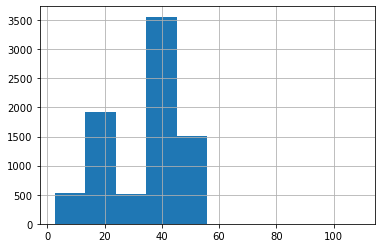

In [147]:
df.loc[df['Salary or Hourly']=='Hourly','Hourly Rate'].hist()

In [152]:
ttest_1samp(df.loc[(df.Department=='POLICE')&(df['Salary or Hourly']=='Salary'), 'Annual Salary'],86000)

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

In [161]:
mostt=pd.crosstab(df.Department,df['Salary or Hourly']).sort_values(by='Hourly', ascending=False).head(1)
mostt.index[0]

'STREETS & SAN'

In [165]:
ttest_1samp(df[(df['Salary or Hourly']=='Hourly')&(df.Department==mostt.index[0])]['Hourly Rate'],35)

Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564707717e-21)

In [166]:
data=df.loc[df['Salary or Hourly']=='Hourly','Hourly Rate']
error=stats.sem(data)
data_mean=data.mean()
size=data.shape[0]
dof=size-1

from scipy.stats import t
t.interval(alpha=0.95, df=dof, loc=data_mean, scale=error)

(32.52345834488529, 33.05365708767727)

In [171]:
from scipy.stats import chi2

In [172]:
chi2.interval(0.95,1)

(0.0009820691171752583, 5.023886187314888)